In [1]:
#from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import pairgen
import scramble

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams["animation.html"] = "jshtml"
mpl.rcParams["animation.embed_limit"] = 100

In [2]:
DEMO_ROWS = 4
SCRAMBLE_COLS = 1
DEMO_COLS = 2

In [3]:
def draw_triangle(subplot, triangle, color):
    draw = triangle.copy()
    draw = np.concatenate((draw, [draw[0]]))
    
    xs = draw[:, 0]
    ys = draw[:, 1]
    zs = draw[:, 2]
    
    return subplot.plot(xs, ys, zs, f"{color}o-",color=color)

def draw_points(subplot, points):
    p1, p2 = points
    
    xs = [p1[0], p2[0]]
    ys = [p1[1], p2[1]]
    l = subplot.plot(xs, ys, "mo--", zorder=2)
    
    return l[0]

def draw_plane(subplot):
    X, Y = np.meshgrid(np.arange(*pairgen.ylim()), np.arange(*pairgen.ylim()))
    Z = 0*X
    
    p = subplot.plot_surface(X, Y, Z, alpha=0.1) # the horizontal plane
    return p

In [4]:
def draw_pair(subplot, base, triangle):
    
    
    subplot.set_xlim(*pairgen.xlim())
    subplot.set_ylim(*pairgen.ylim())
    subplot.set_zlim(*pairgen.zlim())
    
    b = draw_triangle(subplot, base, "b")
    t = draw_triangle(subplot, triangle, "r")
    
    return b[0], t[0]

In [5]:
def draw_example(subplot, generator):
    base = pairgen.create_base()
    triangle, points = pairgen.gen3D(generator)
   
    p = draw_plane(subplot)
    b, t = draw_pair(subplot, base, triangle)
    l = draw_points(subplot, points)
    
    return p, b, t, l

In [6]:
def draw_deg_example(subplot, generator):
    tr1, tr2 = generator()
   
    p = draw_plane(subplot)
    b, t = draw_pair(subplot, tr1, tr2)
    
    return p, b, t

In [7]:
def draw_scramble_subplot(subplot, base, triangle):
    p = draw_plane(subplot)
    b, t = draw_pair(subplot, base, triangle)
    return p, b, t

In [8]:
def draw_scramble_example(subplot_a, subplot_b, scramble_foo):
    _, base, triangle = pairgen.randpair3D()
    new_base, new_triangle = scramble.scramble(base, triangle, scramble_foo)
    
    pbt1 = draw_scramble_subplot(subplot_a, base, triangle)
    pbt2 = draw_scramble_subplot(subplot_b, new_base, new_triangle)
    
    return *pbt1, *pbt2

In [9]:
def draw_demo(generator):
    fig = plt.figure(figsize=(20,20))
    
    for i in range(DEMO_ROWS):
        for k in range(DEMO_COLS):
            subplot = fig.add_subplot(DEMO_ROWS, DEMO_COLS, i*DEMO_COLS + k + 1, projection='3d')
            draw_example(subplot, generator)
    
    plt.show()

In [10]:
def draw_deg_demo(generator):
    fig = plt.figure(figsize=(20,20))
    
    for i in range(DEMO_ROWS):
        for k in range(DEMO_COLS):
            subplot = fig.add_subplot(DEMO_ROWS, DEMO_COLS, i*DEMO_COLS + k + 1, projection='3d')
            draw_deg_example(subplot, generator)
    
    plt.show()

In [11]:
def draw_scramble_demo(scramble_foo):
    fig = plt.figure(figsize=(20,20))
    
    for i in range(DEMO_ROWS):
        for k in range(SCRAMBLE_COLS):
            subplot_a = fig.add_subplot(DEMO_ROWS, SCRAMBLE_COLS*2, i*SCRAMBLE_COLS*2 + 2*k + 1, projection='3d')
            subplot_b = fig.add_subplot(DEMO_ROWS, SCRAMBLE_COLS*2, i*SCRAMBLE_COLS*2 + 2*k + 2, projection='3d')
            draw_scramble_example(subplot_a, subplot_b, scramble_foo)
    
    plt.show()

In [12]:
def animate_scramble_demo(scramble_foo):
    fig = plt.figure(figsize=(20,20))
    
    subplots = []
    
    for i in range(DEMO_ROWS):
        for k in range(SCRAMBLE_COLS):
            subplot_a = fig.add_subplot(DEMO_ROWS, SCRAMBLE_COLS*2, i*SCRAMBLE_COLS*2 + 2*k + 1, projection='3d')
            subplot_b = fig.add_subplot(DEMO_ROWS, SCRAMBLE_COLS*2, i*SCRAMBLE_COLS*2 + 2*k + 2, projection='3d')
            data = draw_scramble_example(subplot_a, subplot_b, scramble_foo)
            
            subplots.append((subplot_a, subplot_b, data))
    
    def animate(i):
        datas = []
        for subplot_a, subplot_b, data in subplots:
            subplot_a.view_init(elev=20, azim=i*36)
            subplot_b.view_init(elev=20, azim=i*36)
            datas.extend(data)
        return datas
    
    anim = animation.FuncAnimation(fig, animate, frames=10, interval=200, blit=True)
    return anim

In [13]:
def animate_demo(generator):
    fig = plt.figure(figsize=(20,20))
    
    subplots = []
    
    for i in range(DEMO_ROWS):
        for k in range(DEMO_COLS):
            subplot = fig.add_subplot(DEMO_ROWS, DEMO_COLS, i*DEMO_COLS + k + 1, projection='3d')
            data = draw_example(subplot, generator)
            subplots.append((subplot, data))
    
    def animate(i):
        datas = []
        for subplot, data in subplots:
            subplot.view_init(elev=20, azim=i*36)
            datas.extend(data)
        return datas
    
    anim = animation.FuncAnimation(fig, animate, frames=10, interval=200, blit=True)
    return anim

In [14]:
def animate_deg_demo(generator):
    fig = plt.figure(figsize=(20,20))
    
    subplots = []
    
    for i in range(DEMO_ROWS):
        for k in range(DEMO_COLS):
            subplot = fig.add_subplot(DEMO_ROWS, DEMO_COLS, i*DEMO_COLS + k + 1, projection='3d')
            data = draw_deg_example(subplot, generator)
            subplots.append((subplot, data))
    
    def animate(i):
        datas = []
        for subplot, data in subplots:
            subplot.view_init(elev=20, azim=i*36)
            datas.extend(data)
        return datas
    
    anim = animation.FuncAnimation(fig, animate, frames=10, interval=200, blit=True)
    return anim

In [15]:
#draw_demo(pairgen.B1)

In [16]:
#draw_demo(pairgen.B2)

In [17]:
#draw_demo(pairgen.B3)

In [18]:
#draw_demo(pairgen.B4)

In [19]:
##animate_demo(testgen.B1)

In [20]:
##animate_demo(testgen.B2)

In [21]:
##animate_demo(testgen.B3)

In [22]:
##animate_demo(testgen.B4)

In [23]:
#draw_scramble_demo(scramble.point_stretch)

In [24]:
##animate_scramble_demo(scramble.point_stretch)

In [25]:
#draw_scramble_demo(scramble.line_stretch)

In [26]:
#draw_scramble_demo(scramble.plane_stretch)

In [27]:
#draw_scramble_demo(scramble.rotation)

In [28]:
##animate_scramble_demo(scramble.rotation)

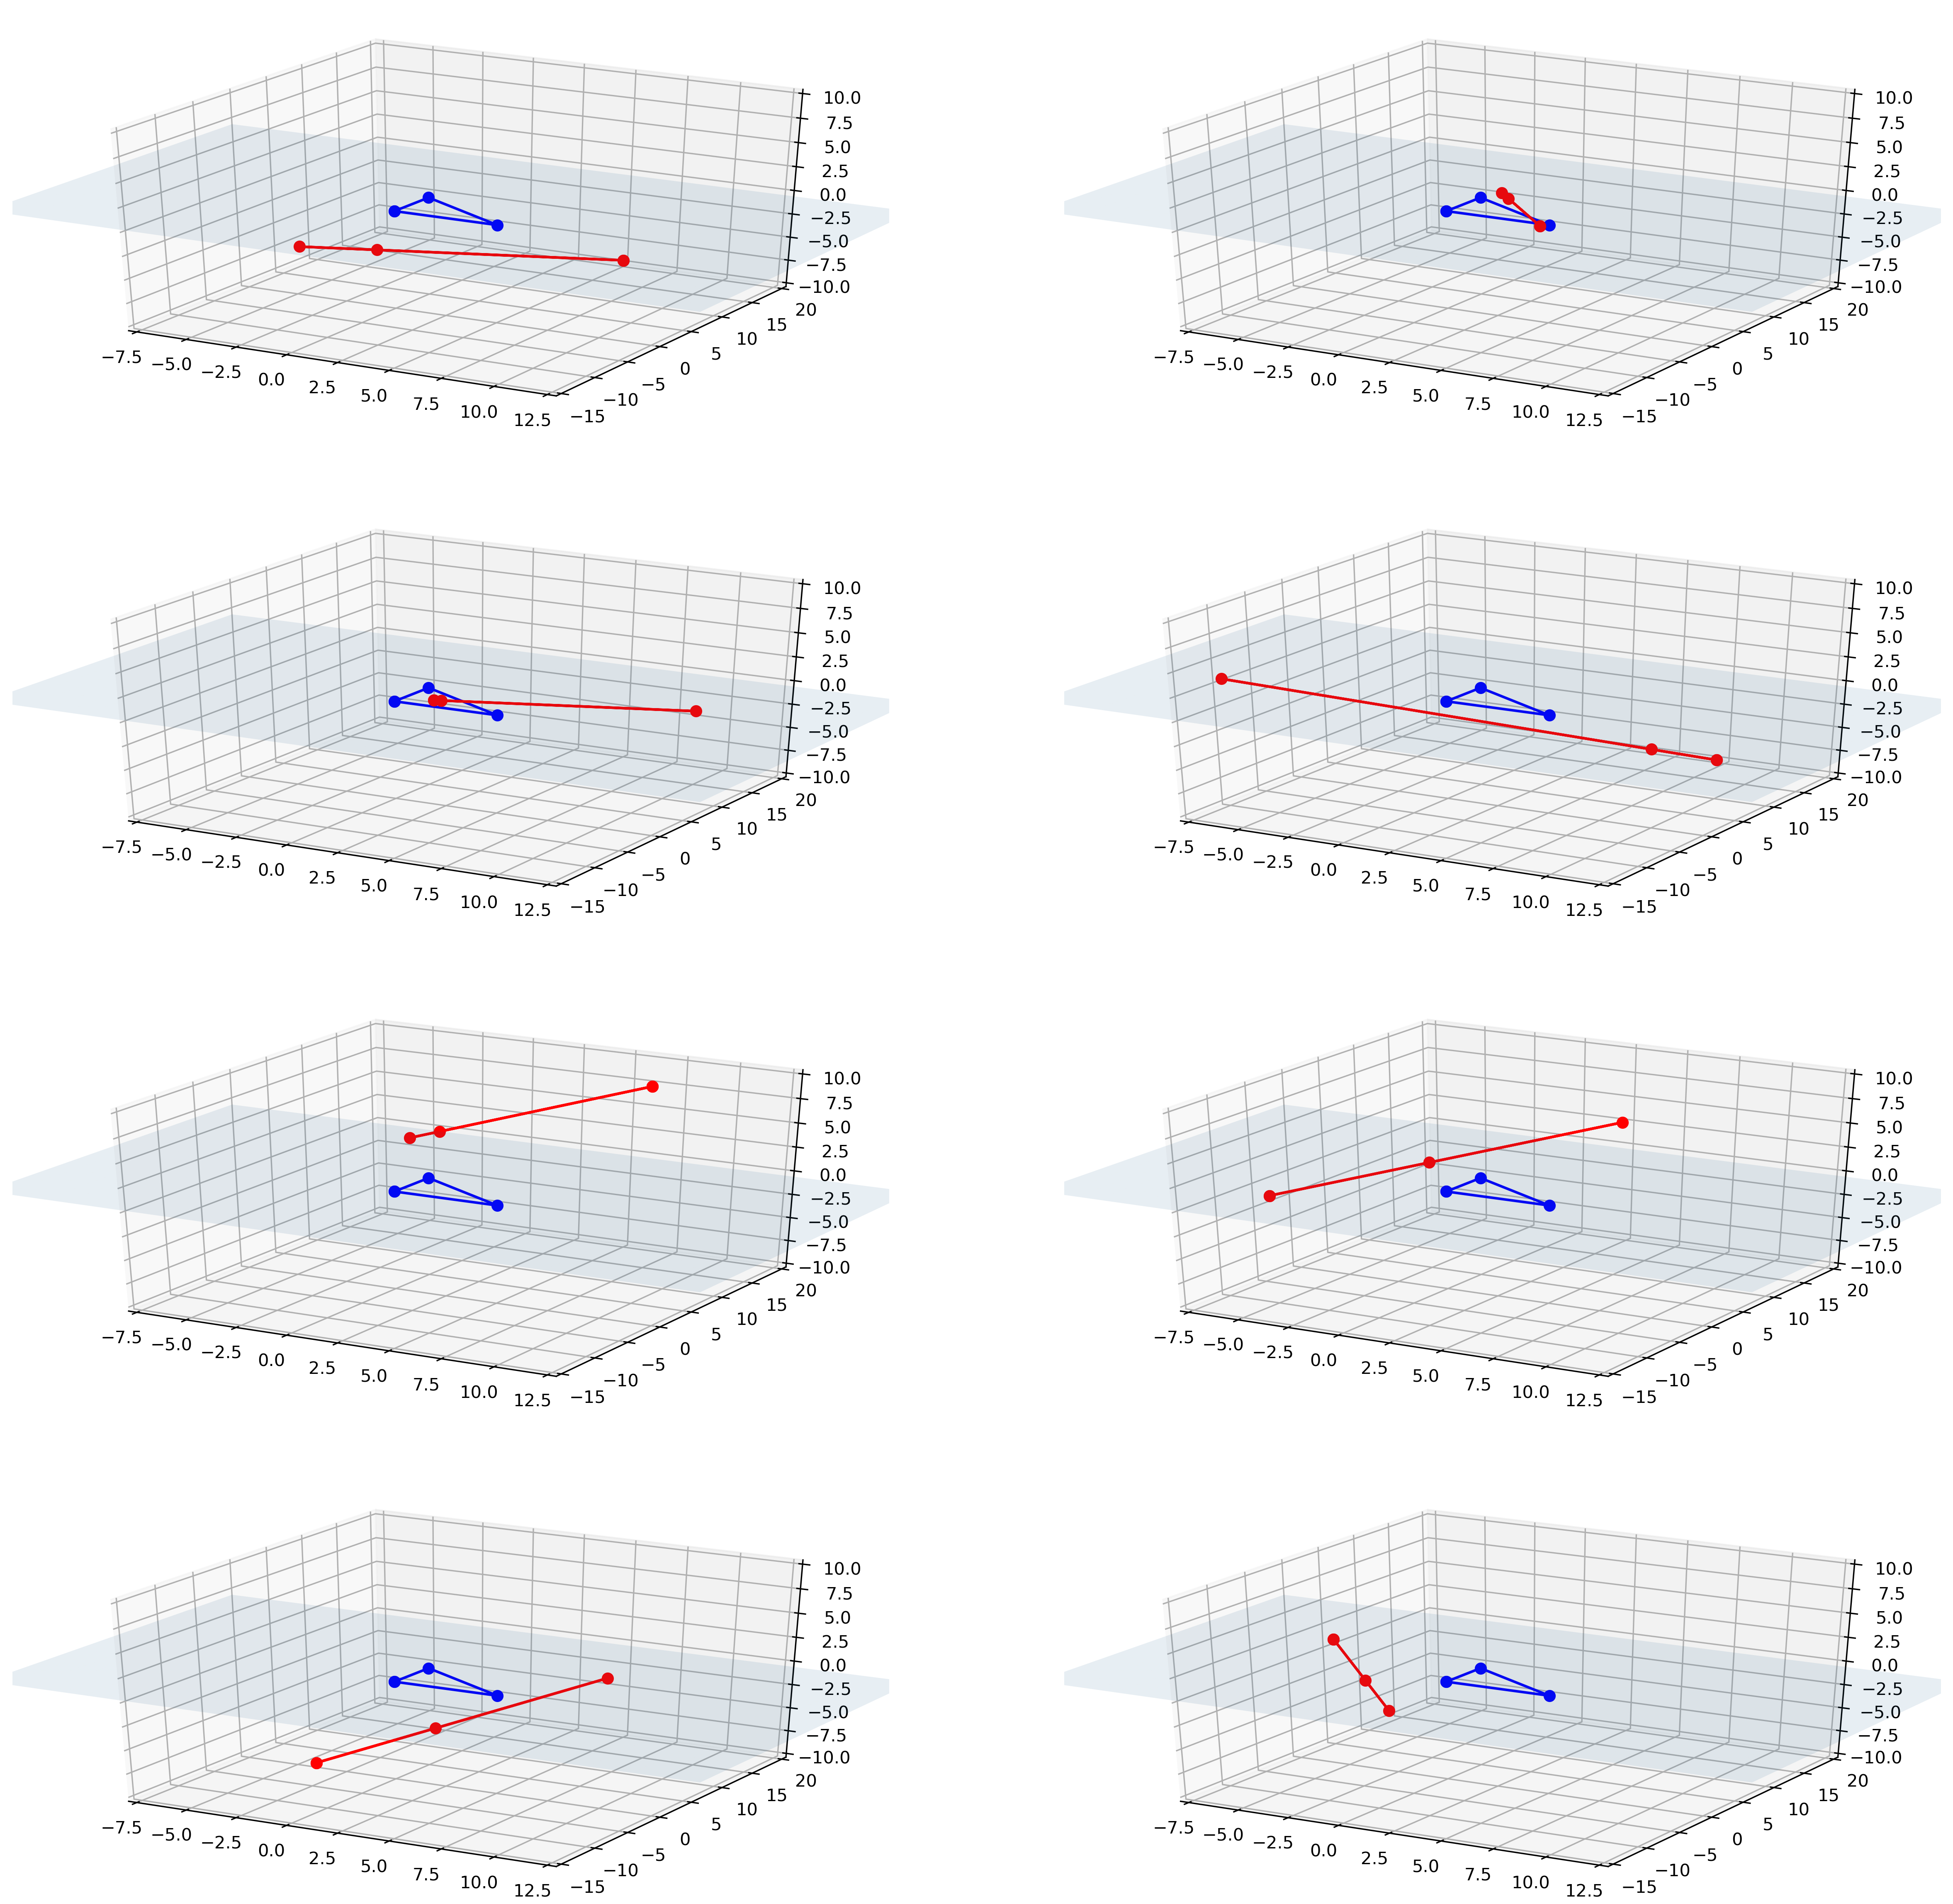

In [29]:
draw_deg_demo(pairgen.LT2)

In [ ]:
##animate_deg_demo(pairgen.LT2)

In [31]:
pairgen.randdegenerate()

(array([[0, 0, 0],
        [5, 0, 0],
        [0, 5, 0]]),
 array([[ 3.17   , 14.36   , -5.46   ],
        [ 2.3524 ,  0.3936 ,  0.6552 ],
        [ 3.12912, 13.66168, -5.15424]]),
 True)